### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

# Método Variacional
Outro método bastante usado para obter soluções aproximadas de sistemas quânticos é o método variacional. A seguir veremos uma versão simples deste método e sua aplicação a alguns sistemas interessantes.

## Teorema variacional (estado fundamental)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja 
$$H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$$
tal que
$$E_{n+1}\ge E_{n}.$$
Ou seja, ordenamos os autovalores em ordem não decrescente. Neste contexto, segue que
$$\langle H\rangle_{\phi} \ge E_{0}\ \forall |\phi\rangle \text{ com } ||\phi||=1.$$

### Prova
A prova deste teorema é uma aplicação simples do fato de que o valor médio de uma variável aleatória é um número que está entre seus valores mínimo e máximo. No entanto, vamos repetir aqui essa prova aqui:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) \\
& = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \ge \sum_{n}E_{0}|\langle\psi_{n}|\phi\rangle|^{2} \\
& = E_{0}\sum_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& = E_{0}\sum_{n}Pr(E_{n}|\phi) \\
& = E_{0}(1) \\
& = E_{0},
\end{align}
em que usamos $E_{n}\ge E_{0}$, a regra de Born, $Pr(E_{n}|\phi)=|\langle\psi_{n}|\phi\rangle|^{2}$, e a normalização para as probabilidades, $\sum_n Pr(E_{n}|\phi)=1.$ 

$\hspace{25cm} \square$

### Exemplo
Vamos considerar o oscilador harmônico quântico unidimensional (OHQ1D):
$$H = \frac{P^{2}}{2m}+\frac{m\omega^{2}X^{2}}{2}.$$
Uma __função de onda teste__ natural, para começar, é uma gaussiana
$$\phi(x) = Ae^{-bx^{2}}.$$
Normalizando teremos
\begin{align}
& \int_{-\infty}^{\infty}|\phi(x)|^{2}dx = |A|^{2}\int_{-\infty}^{\infty}e^{-2bx^{2}}dx = |A|^{2}\sqrt{\frac{\pi}{2b}} \\
& \therefore\ A = \big(2b/\pi\big)^{1/4},
\end{align}
teremos que
$$\phi(x) = \big(2b/\pi\big)^{1/4}e^{-bx^{2}} = \phi(x,b).$$
Podemos chamar $b$ de __parâmetro variacional__.

Com isso, vem que
\begin{align}
\langle H\rangle_{\phi} & = \frac{1}{2m}\langle P^{2}\rangle_{\phi} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\int_{-\infty}^{+\infty}dx e^{-bx^{2}}\partial_{xx}e^{-bx^{2}} + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\int_{-\infty}^{+\infty}dx  x^{2}e^{-2bx^{2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}dx x^{2}e^{-bx^{2}} - 2b\int_{-\infty}^{+\infty}dx e^{-2bx^{2}}\Big) + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} - 2b\sqrt{\pi/2b}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(-\frac{\sqrt{2\pi b}}{2}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = \frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}.
\end{align}

Abaixo está mostrado o gráfico para $\langle H\rangle_\phi$, $E_0$ e $E_1$.

In [7]:
from sympy import symbols, diff, exp, integrate, oo, init_printing
init_printing(use_unicode=True)
b = symbols('b', positive=True)
x = symbols('x')
diff(exp(-b*x**2),x,2)

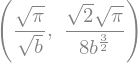

In [8]:
integrate(exp(-b*x**2),(x,-oo,+oo)), integrate(x**2*exp(-2*b*x**2),(x,-oo,+oo))

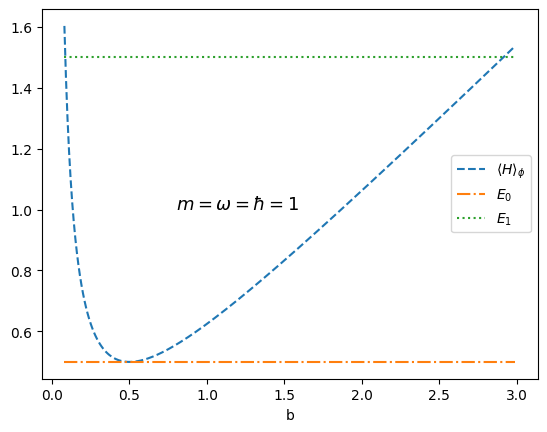

In [9]:
import numpy as np
b = np.arange(0.08,3,0.01); hbb = 1; om = 1; m = 1
Hm = (b*hbb**2)/(2*m) + (m*om**2)/(8*b)
E0 = ((hbb*om)/2)*np.ones(len(b)); E1 = ((3*hbb*om)/2)*np.ones(len(b))
from matplotlib import pyplot as plt
plt.plot(b,Hm,'--',label=r'$\langle H\rangle_\phi$')
plt.plot(b,E0,'-.',label=r'$E_0$'); plt.plot(b,E1,':',label=r'$E_1$')
plt.annotate(r'$m=\omega=\hbar=1$',xy=(0.8,1),xytext=(0.8,1),fontsize=13)
plt.legend(); plt.xlabel('b'); plt.show()

Com isso, obtemos o $b$ que nos retorna um valor __extremo__ de $\langle H\rangle_{\phi}$ usando
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi} = \frac{\partial}{\partial b}\Big(\frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}\Big) = \frac{\hbar^{2}}{2m} - \frac{m\omega^{2}}{2^{3}b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}
Pode-se verificar que $\partial_{bb}\langle H\rangle_\phi > 0,$ e que portanto $b=m\omega/2\hbar$ é um ponto de mínimo.

Assim temos uma estimativa para a energia do estado fundamental:
\begin{align}
\langle H\rangle_{\phi(b_{opt})} & = \frac{b_{opt}\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b_{opt}}  \\
& =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} \\
&  =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} \\
& = \hbar\omega(1/2),
\end{align}
que coincide com a energia do estado fundamental do OHQ1D. Isso ocorreu porquê escolhemos uma função de onda teste que tem a mesma forma da autofunção correspondente ao estado fundamental do OHQ1D.

## Teorema variacional (1º estado excitado)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja $H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$ tal que $E_{n+1}\ge E_{n}$, e seja o __vetor de estado teste__ $|\phi\rangle$ ortogonal ao autovetor correspondente à menor energia, $|\psi_{0}\rangle$ (ou ao subespaço correspondente a $E_{0}$, se houver degenerescência), i.e., 
$$\langle\phi|\psi_{0}\rangle :=0.$$
Segue que
$$\langle H\rangle_{\phi} \ge E_{1}.$$

### Prova
Neste caso, teremos que:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) \\
& = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2}  \\
& = E_{0}|\langle\psi_{0}|\phi\rangle|^{2} + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& = E_{0}0 + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \ge \sum_{n>0}E_{1}|\langle\psi_{n}|\phi\rangle|^{2} \\
& = E_{1}\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2} \\
& = E_{1}\Big(0+\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}\Big) \\
& = E_{1}\Big(|\langle\psi_{0}|\phi\rangle|^{2}+\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}\Big) \\
& = E_{1}\sum_{n}Pr(E_{n}|\phi) \\
& = E_{1}(1) \\
& = E_{1}.
\end{align}
$\hspace{2cm} \square$

Esse teorema pode ser estendido para estados com maior energia (2º, 3º, ... estados excitados). A ideia é a mesma. Por exemplo, para o 2º estado excitado, se usarmos um vetor de estado teste $|\phi\rangle$ ortogonal aos autovetores do estado fundamental, $|\psi_{0}\rangle$, e do 1º estado excitado, $|\psi_{1}\rangle$, teremos que $\langle H\rangle_{\phi}\ge E_{2}.$ 

### Exemplo
Vamos considerar novamente o OHQ1D. Mas desta vez queremos estimar a energia do 1º estado excitado. Para isso, devemos utilizar uma função teste ortogonal à função de onda do estado fundamental. Como "não conhecemos" a solução exata, usamos uma função teste que seja ortogonal à função teste ótima obtida quando da estimativa da energia do estado fundamental. Podemos usar
$$\phi_{1}(x) = Axe^{-bx^{2}} = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}xe^{-bx^{2}}.$$
Pode-se verificar que
$$\langle\phi_{1}|\phi\rangle = \int_{-\infty}^{+\infty}dx\phi_{1}^{*}(x)\phi(x)\propto \int_{-\infty}^{+\infty}xe^{-2bx^{2}}dx=0.$$

In [11]:
b = symbols('b', positive=True)
integrate(x*exp(-2*b*x**2),(x,-oo,+oo))

Neste caso, teremos
\begin{align}
\langle H\rangle_{\phi_{1}}  & = \frac{1}{2m}\langle P^{2}\rangle_{\phi_{1}} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi_{1}} \\
& = -\frac{\hbar^{2}}{2m}\int_{-\infty}^{+\infty}Axe^{-bx^{2}}\partial_{xx}Axe^{-bx^{2}}dx + \frac{m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{2}A^{2}x^{2}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\int_{-\infty}^{+\infty}xe^{-bx^{2}}\big(4b^{2}x^{3}-6bx\big)e^{-bx^{2}}dx + \frac{A^{2}m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx -6b\int_{-\infty}^{+\infty}x^{2}e^{-2bx^{2}}dx\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}.
\end{align}

In [12]:
diff(x*exp(-b*x**2),x,2)

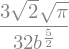

In [13]:
integrate(x**4*exp(-2*b*x**2), (x,-oo,+oo))

Para obter o valor mínimo, fazemos
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi_{1}} = \frac{\partial}{\partial b}\Big(\ \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}\Big) =  \frac{3\hbar^{2}}{2m} - \frac{3m\omega^{2}}{8b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}
Pode-se verificar que $\partial_{bb}\langle H\rangle_{\phi_1} > 0,$ e que portanto $b=m\omega/2\hbar$ é um ponto de mínimo.

Assim, a estimativa varicional para a energia do 1º estado excitado do OHQ1D é
\begin{align}
\langle H\rangle_{\phi_{1}(b_{opt})} & = \frac{3b_{opt}\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b_{opt}} \\
& =  \frac{m\omega}{2\hbar}\frac{3\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{3m\omega^{2}}{8} \\
& = \hbar\omega(3/2) \\
& = \hbar\omega(1+1/2),
\end{align}
que também coincide com o resultado exato, também porquê usamos uma função de onda teste com a mesma forma da função de onda exata.

## Estimativa do erro
Como estamos lidando com um técnica para obter soluções aproximadas, seria interessante se pudermos estimar o erro associado com uma certa função de onda teste. Para obter esse erro, vamos começar escrevendo o vetor de estado teste como uma combinação linear dos autovetores exatos (que não conhecemos mas que existem):
$$|\phi\rangle = \sum_{n}c_{n}|\psi_{n}\rangle \equiv \sum_{n}\langle\psi_{n}|\phi\rangle|\psi_{n}\rangle.$$
Se o estado teste é igual ao autovetor correspondente ao estado fundamental, então $|c_{0}|=1$ (lembre que $|c_{n}|\le 1$ e $\sum_{n}|c_{n}|^{2}=1$). Quanto mais longe estamos do estado fundamental exato, menor será $|c_{0}|\le 1$. Por conseguinte, podemos quantificar o quão errada está nossa função de onda teste em relação ao autovetor do estado fundamental usando
$$\epsilon(\phi) := 1-|c_{0}|^{2}.$$

Usando que 
$$Pr(E_{n}|\phi) = |\langle\psi_{n}|\phi\rangle|^{2} = |c_{n}|^{2},$$

teremos que (lembre que $E_{0}\le E_{1}\le E_{2}\le\cdots$)
\begin{align}
\langle H\rangle_{\phi}-E_{0} & = \sum_{n}E_{n}Pr(E_{n}|\phi)-E_{0} \\
& = \sum_{n}E_{n}|c_{n}|^{2}-E_{0} \\
& = E_{0}|c_{0}|^{2} + \sum_{n>0}E_{n}|c_{n}|^{2} - E_{0} \\
& \ge E_{0}|c_{0}|^{2} + \sum_{n>0}|c_{n}|^{2}E_{1} - E_{0} \\
& = -E_{0}(1-|c_{0}|^{2}) + (1-|c_{0}|^{2})E_{1} \\
& = (E_{1}-E_{0})(1-|c_{0}|^{2}) \\
& = (E_{1}-E_{0})\epsilon(\phi),
\end{align}
em que usamos que
$$\sum_{n}|c_{n}|^{2} = \sum_{n}Pr(E_{n}|\phi)=1 = |c_{0}|^{2}+\sum_{n>0}|c_{n}|^{2}\ \therefore\ \sum_{n>0}|c_{n}|^{2} = 1-|c_{0}|^{2}.$$

Então um __limite superior__ para o erro é o seguinte
$$\epsilon(\phi) \le \frac{\langle H\rangle_{\phi}-E_{0}}{E_{1}-E_{0}}.$$
Esse limite superior pode ser calculado se conhecermos $E_{0}$ e $E_{1}$ de experimentos, ou seja, se queremos obter funções de onda que descrevam um sistema com espectro de autovalores conhecido do experimento.

### Exemplo
Fazendo $\hbar/m\omega=1$, mostramos na figura abaixo o limite superior para o erro do vetor de estado teste em função do parâmetro livre $b$ para estimativa da energia do estado fundamental do OHQ1D:
\begin{align}
\epsilon(\phi) & = \frac{\frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b} - \hbar\omega/2}{3\hbar\omega/2 - \hbar\omega/2} \\
 & = \frac{b\hbar}{2m\omega} + \frac{m\omega}{2^{3}b\hbar} - 1/2 \\
 & = \epsilon(b).
\end{align}
Pode-se mostrar que o erro mínimo ocorre para $b=b_{opt}.$

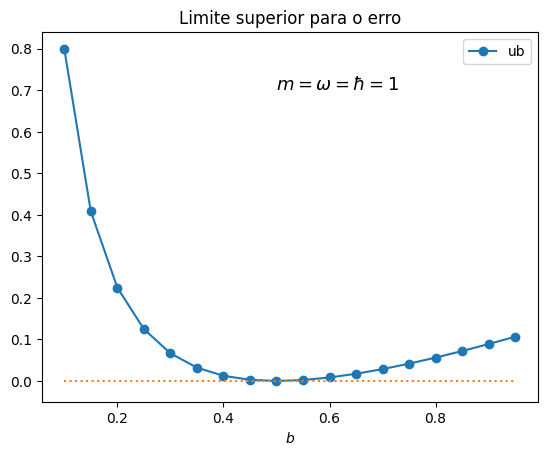

In [14]:
# hb = w = m = 1
import matplotlib; from matplotlib import pyplot as plt
import numpy as np; b = np.arange(0.1,1,0.05)
ub = b/2 + 1/(8*b) - 1/2; z = np.zeros(len(b))
plt.plot(b,ub,'-o',label='ub'); plt.plot(b,z,':')
plt.xlabel(r'$b$'); plt.ylim(-0.05,); plt.legend()
plt.title('Limite superior para o erro')
plt.annotate(r'$m=\omega=\hbar=1$',xy=(0.5,0.7),xytext=(0.5,0.7),fontsize=13)
plt.show()

## Limites variacionais inferiores e superiores
### Teorema
Seja $|\phi\rangle$ um vetor de estado teste. Existe um autovalor $E_{k}$ do hamiltoniano $H$ para o qual a seguinte desigualdade é satisfeita:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$

#### Prova
Começamos considerando a variância do hamiltoniano para o estado teste:
\begin{align}
Var(H)_{\phi} & = \big\langle\big(H-\langle H\rangle_{\phi}I\big)^{2}\big\rangle \\
& = \sum_{n}\big(E_{n}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi).
\end{align}

Para uma dada função de onda teste $\phi$, existe algum autovalor $E_{k}$ que é tão próximo do valor médio $\langle H\rangle_{\phi}$ quanto qualquer outro autovalor. Ou seja, consideremos a __condição__:
$$\big(E_{k}-\langle H\rangle_{\phi}\big)^{2} \le \big(E_{n}-\langle H\rangle_{\phi}\big)^{2}\ \forall n.$$

Com isso, vem que
\begin{align}
Var(H)_{\phi} & \ge \sum_{n}\big(E_{k}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi) \\
& = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}\sum_{n}Pr(E_{n}|\phi) \\
& = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}.
\end{align}
Então
$$\sqrt{Var(H)_{\phi}} \ge |E_{k}-\langle H\rangle_{\phi}|.$$

Teremos assim os seguintes casos
\begin{align}
E_{k}\ge\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge E_{k}-\langle H\rangle_{\phi} \ \therefore\ E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}, \\
E_{k}\le\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge -E_{k}+\langle H\rangle_{\phi} \ \therefore\ E_{k} \ge \langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}}.
\end{align}
Com isso segue a seguinte desigualdade dupla:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$
$\square$

Note que, dada uma certa função de onda teste $\phi$, essas desigualdades valem somente para o autovalor $E_{k}$ mais próximo de $\langle H\rangle_{\phi}$. Isso é, de certo modo, lógico pois se a variância de $H$ é $0$ isso implica que $\phi$ é autovetor de $H$, e neste caso os limites inferior e superior acima coincidem. 

Por outro lado, podemos usar esses limites inferior e superior para quantificar o quão perto um certo vetor de estado teste $|\phi\rangle$ está de ser um certo autovetor $|\psi_{k}\rangle$ de $H$.

OBS. Acima tínhamos $x\ge y$ e usamos que $\sqrt{x}\ge \sqrt{y}$, o que é exemplicado na figura abaixo, que mostra que $\sqrt{x}$ é uma função monotonicamente crescente de $x$.

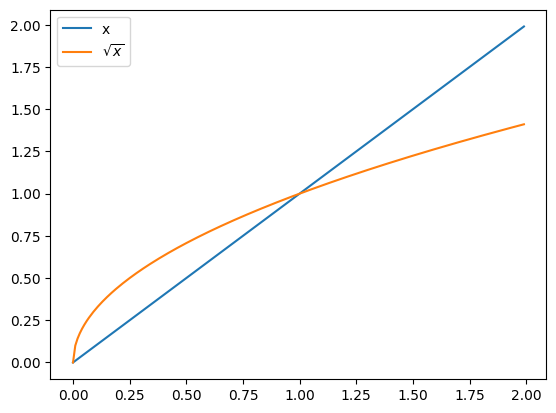

In [15]:
import numpy as np; from matplotlib import pyplot as plt
x = np.arange(0,2,0.01); y = np.sqrt(x)
plt.plot(x,x, label='x'); plt.plot(x,y, label=r'$\sqrt{x}$'); plt.legend(); plt.show()

### Exemplo
Vamos considerar os cálculos feitos para estimar a energia do __estado fundamental do OHQ1D__, para o qual temos $\phi(x,b)=(2b/\pi)^{1/4}e^{-bx^{2}}$ e 
$$\langle H\rangle_{\phi} = \frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{8b}.$$
Para calcular a variância, precisamos ainda obter
\begin{align}
\langle H^{2}\rangle_{\phi} & = \langle\phi|H^{2}|\phi\rangle \\
& = \langle\phi|\Big(\frac{P^{2}}{2m}+\frac{m\omega^{2}}{2}X^{2}\Big)^{2}|\phi\rangle \\
& = \frac{1}{4m^{2}}\langle\phi|P^{4}|\phi\rangle + \frac{m^{2}\omega^{4}}{4}\langle\phi|X^{4}|\phi\rangle + \frac{\omega^{2}}{4}\langle\phi|\big(P^{2}X^{2}+X^{2}P^{2}\big)|\phi\rangle.
\end{align}


Passemos para o cálculo desses valores médios. Começamos com
\begin{align}
\langle\phi|P^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}dx\phi^{*}\big(-i\hbar\partial_{x}\big)^{4}\phi \\
& = \hbar^{4}\int_{-\infty}^{+\infty}dx\phi^{*}\partial_{xxxx}\phi \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}dx 4b^{2}\big(4b^{2}x^{4}-12bx^{2}+3\big)e^{-2bx^{2}} \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}4b^{2}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}}-12b\frac{\sqrt{2\pi}}{8b^{3/2}}+3\sqrt{\frac{\pi}{2b}}\Big) \\
& = 3b^{2}\hbar^{4}.
\end{align}

In [16]:
x,b = symbols('x b'); diff(exp(-b*x**2),x,4)

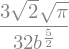

In [17]:
b = symbols('b', positive=True)
integrate(x**4*exp(-2*b*x**2),(x,-oo,+oo))

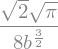

In [18]:
integrate(x**2*exp(-2*b*x**2),(x,-oo,+oo))

In [19]:
from sympy import simplify, sqrt, pi
hb = symbols('hbar')
simplify(hb**4*sqrt(2*b/pi)*4*b**2*( (4*b**2*3*sqrt(2*pi))/(32*b**(5/2))  
         - (12*b*sqrt(2*pi))/(8*b**(3/2)) + (3*sqrt(pi))/(sqrt(2*b))))

Seguindo, consideramos
\begin{align}
\langle\phi|X^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}x^{4}|\phi|^{2}dx \\
& = \sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx \\
& = \sqrt{\frac{2b}{\pi}}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = \frac{3}{16b^{3/2}}.
\end{align}

Já
\begin{align}
\langle\phi|X^{2}P^{2}|\phi\rangle & = \int_{-\infty}^{+\infty}\langle\phi|X^{2}P|x\rangle\langle x|P|\phi\rangle \\
& = \int_{-\infty}^{+\infty}dx\langle\phi|X^{2}P|x\rangle\frac{\hbar}{i}\partial_{x}\langle x|\phi\rangle \\
& = \int_{-\infty}^{+\infty}dx'\langle\phi|X^{2}|x'\rangle\langle x'|P\big(\int_{-\infty}^{+\infty}dx\big(-i\hbar\partial_{x}\phi(x)\big)|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx'\langle\phi|x'^{2}|x'\rangle\frac{\hbar}{i}\partial_{x'}\big(\int_{-\infty}^{+\infty}dx\big(-i\hbar\partial_{x}\phi(x)\big)\langle x'|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\phi(x')^{*}x'^{2}\frac{\hbar}{i}\partial_{x'}\big(\big(-i\hbar\partial_{x}\phi(x)\big)\delta(x'-x)\big) \\
& = \int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\big(-i\hbar\partial_{x}\big)^{2}\phi(x) \\
& = -\hbar^{2}\int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\partial_{xx}\phi(x) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty} x^{2}2bx\big(2bx^{2}-3\big)e^{-2bx^{2}}dx \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\Big(4b^2\int_{-\infty}^{+\infty} x^5e^{-2bx^{2}}dx - 6b\int_{-\infty}^{+\infty} x^3 e^{-2bx^{2}}dx\Big) \\
& = 0+0.
\end{align}

Pode-se mostrar também que
\begin{align}
\langle\phi|P^{2}X^{2}|\phi\rangle & = \int_{-\infty}^{\infty} dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\int_{-\infty}^{\infty} dx\phi(x)^{*}\partial_{xx}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{\infty} dxe^{-bx^{2}}\partial_{xx}\big(x^{2}e^{-bx^{2}}\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\Big(4b^{2}\int_{-\infty}^{\infty}dxx^{4}e^{-2bx^{2}} - 10b\int_{-\infty}^{\infty}dxx^{2}e^{-2bx^{2}}+2\int_{-\infty}^{\infty}dxe^{-2bx^{2}} \Big) \\
& = -\frac{9\hbar^{2}}{4}.
\end{align}
Essas integrais, e a soma envolvida, estão feitas com a ajuda do código Sympy abaixo.

In [20]:
b = symbols('b', positive = True); simplify(diff(x**2*exp(-b*x**2),x,2))

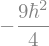

In [21]:
simplify( -hb**2*sqrt(2*b/pi)*(4*b**2*integrate(x**4*exp(-2*b*x**2),(x,-oo,oo)) 
                              -10*b*integrate(x**2*exp(-2*b*x**2),(x,-oo,oo))
                              +4*integrate(exp(-2*b*x**2),(x,-oo,oo))) )

Obtemos assim
\begin{align}
\langle H^{2}\rangle_{\phi} & = \frac{1}{4m^{2}}3b^{2}\hbar^{4} + \frac{m^{2}\omega^{4}}{4}\frac{3}{16b^{3/2}} + \frac{\omega^{2}}{4}\Big(-\frac{9\hbar^{2}}{4}+0\Big) \\
& = \frac{3b^{2}\hbar^{4}}{4m^{2}} + \frac{3m^{2}\omega^{4}}{64b^{3/2}} - \frac{9\omega^{2}\hbar^{2}}{16}.
\end{align}

Usando $\langle H\rangle_\phi=\frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}$ teremos que
\begin{align}
Var(H)_\phi & = \langle H^2\rangle_\phi - \langle H\rangle_\phi^2 \\
& = \frac{3b^{2}\hbar^{4}}{4m^{2}} + \frac{3m^{2}\omega^{4}}{64b^{3/2}} - \frac{9\omega^{2}\hbar^{2}}{16} - \frac{b^2\hbar^4}{4m^2} - \frac{m^2\omega^4}{64b^2} - 2\frac{b\hbar^{2}}{2m}\frac{m\omega^{2}}{2^{3}b} \\
& = \frac{b^{2}\hbar^{4}}{2m^{2}} + \frac{3m^{2}\omega^{4}}{64b^{3/2}} - \frac{9\omega^{2}\hbar^{2}}{16} - \frac{m^2\omega^4}{64b^{3/2}b^{1/2}} - \frac{2\hbar^{2}\omega^{2}}{16} \\
& = \frac{b^{2}\hbar^{4}}{2m^{2}} + \frac{m^{2}\omega^{4}}{64b^{3/2}}(3-b^{-1/2}) - \frac{11\omega^{2}\hbar^{2}}{16}.
\end{align}

A variância e os limites inferior e superior estão mostrados na figura abaixo.

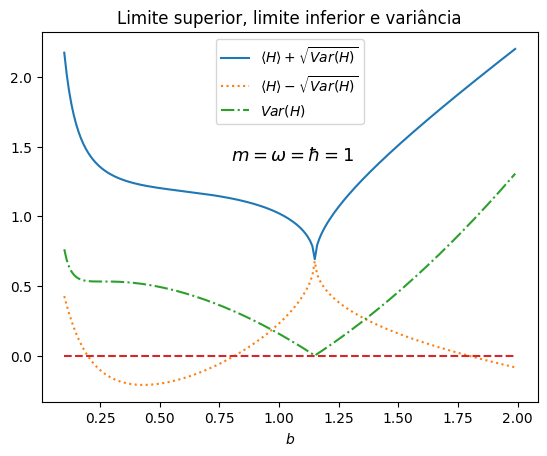

In [27]:
m = 1; w = 1; hbb = 1; b = np.arange(0.1,2,0.01)
d = len(b)#; print(d)
H2m = np.zeros(d); Hm = np.zeros(d); Var = np.zeros(d)
ub = np.zeros(d); lb = np.zeros(d)
for j in range(0,d):
    H2m[j] = (3*b[j]**2*hbb**4)/(4*m**2) + (3*m**2*w**4)/(64*b[j]**(3/2)) - (9*w**2*hbb**2)/16
    Hm[j] = b[j]*((hbb**2)/(2*m)) + (m*w**2)/(8*b[j])
    Var[j] = abs(H2m[j] - Hm[j]**2); ub[j] = Hm[j] + sqrt(Var[j]); lb[j] = Hm[j] - sqrt(Var[j])
plt.plot(b, ub,'-',label=r'$\langle H\rangle + \sqrt{Var(H)}$')
plt.plot(b, lb,':',label=r'$\langle H\rangle - \sqrt{Var(H)}$')
plt.plot(b, Var,'-.',label=r'$Var(H)$'); plt.legend(); plt.xlabel(r'$b$')
z = np.zeros(d); plt.plot(b,z,'--')
plt.annotate(r'$m=\omega=\hbar=1$',xy=(0.8,1.4),xytext=(0.8,1.4),fontsize=13)
plt.title('Limite superior, limite inferior e variância'); plt.show()

---
# Exercícios

$1.$ Aplique o método variacional para estimar a energia do estado fundamental do oscilador harmônico quântico unidimensional usando como função de onda teste
$$\phi(x,b) = \frac{A}{x^{2}+b^{2}}.$$

$2.$ Normalize a função de onda $$\phi_{1}(x) = Axe^{-bx^{2}}$$ para obter $$A = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}.$$

$3.$ Analogamente ao que fizemos no teorema variacional para o 1º estado excitado, use o método variacional para obter um limite superior para $E_{2}$, a energia do 2º estado excitado de um sistema qualquer. Especifique que propriedades a função de onda teste deve ter.

$4.$ Verifique que
$$\langle\phi|P^{2}X^{2}|\phi\rangle = \int dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big).$$

$5.$ Verifique que $b=m\omega/2\hbar$ é um ponto extremo de mínimo para as funções $\langle H\rangle_{\phi(b)}$ e $\langle H\rangle_{\phi_1(b)}$ consideradas nos exemplos acima. Dica: Mostre que $\partial_{bb}\langle H\rangle >0.$

$6.$ Verifique que o erro 
$$\epsilon(b) = \frac{b\hbar}{2m\omega} + \frac{m\omega}{2^{3}b\hbar} - 1/2$$
é mínimo para $b=b_{opt} = m\omega/2\hbar.$

$7.$ Considere o seguinte hamiltoniano de um sistema constituído por dois spins 1/2: 
$$H = I\otimes \sigma_z,$$
em que $I=\begin{bmatrix}1&0\\0&1\end{bmatrix}$ e $\sigma_z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}=|0\rangle\langle 0|-|1\rangle\langle 1|$. Quais são os valores exatos das energias possíveis desse sistema? Considerando a função de onda teste 
$$|\phi\rangle = |\phi(\theta)\rangle = \cos^2(\theta/2)|0\rangle\otimes|0\rangle + \sin(\theta/2)\cos(\theta/2)|0\rangle\otimes|1\rangle + \sin(\theta/2)\cos(\theta/2)|1\rangle\otimes|0\rangle + \sin^2(\theta/2)|1\rangle\otimes|1\rangle,$$
com $\theta\in[0,2\pi]$, aplique o teorema variacional para estimar o menor autovalor desse hamiltoniano.

$8.$ Considere o hamiltoniano de Ising para dois spins 1/2 e com $J_{12}=0,\ h_1=h_2=1\ \forall\ j,k,$ ou seja $H=H_I  = \sigma_1^x\otimes I_2 + I_1\otimes\sigma_2^x = \begin{bmatrix}0&1&1&0\\1&0&0&1\\1&0&0&1\\0&1&1&0\end{bmatrix}$. Os autovalores, exatos, de $H$ são $-2,\ 0,\ 0,\ 2.$ Usando vetor de estado teste $|\phi\rangle = \cos^2\alpha|00\rangle + \sin\alpha\cos\alpha(|01\rangle + |10\rangle) + \sin^2\alpha|11\rangle = \begin{bmatrix} \cos^2\alpha & \sin\alpha\cos\alpha & \sin\alpha\cos\alpha & \sin^2\alpha\end{bmatrix}^T$, com $\alpha\in[0,2\pi]$ e $T$ denotando a transposta matricial, aplique o teorema variacional para estimar o menor autovalor de $H$. 

$9.$ O modelo de Heisenberg para uma cadeia unidimensional de $N$ spins 1/2 é dado pelo Hamiltoniano:
$H_H = -\frac{1}{2}\sum_{j=1}^{N-1} \big(J_x \sigma_j^x \sigma_{j+1}^x + J_y \sigma_j^y \sigma_{j+1}^y + J_z \sigma_j^z \sigma_{j+1}^z + h\sigma_j^z\big),$
em que $J_x,J_y,J_z$ são as integrais de troca e $h$ é o campo magnético externo na direção $z$. Se considerarmos um sistema com $2$ spins e $J_x=J_y=J_z=h=2$, teremos que $H_H = \begin{bmatrix} -1&-1&-1&0 \\ -1&1&-2&-1 \\ -1&-2&1&-1 \\ 0&-1&-1&-1\end{bmatrix},$ cujos autovalores são $\{-3,-1,1,3\}.$ O autovetor correspondente ao menor autovalor de $H_H$ é $|\psi_0\rangle = \frac{1}{2}\begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}^T,$ em que $T$ indica a transposta matricial. Verifique que a função de onda teste $|\phi\rangle = \begin{bmatrix} 2^{-1/2}\cos\alpha & \sin\alpha\cos\beta & \sin\alpha\sin\beta & -2^{-1/2}\cos\alpha \end{bmatrix}^T$, com $\alpha\in[0,2\pi]$ e $\beta=3\pi/4$, é normalizada e ortogonal a $|\psi_0\rangle$, e portanto, segundo o teorema variacional, pode ser utilizada para estimarmos a energia do 1º estado excitado desse sistema. Finalmente, aplique o teorema variacional para estimar a energia do 1º estado excitado desse sistema.